# 1 Introduction
### 1.1 Overview
According to the definition of happiness, happiness could be living a good life, mental state of well-being which positive or pleasant emotions ranging from contentment to intense joy.  The happiness index can reflect the happiness of the country. The higher the happiness is , more happiness the country is and which means the citizen in this country are more happy. Why happiness index is so important to explore? The higher happiness index not only means benignant  emotion to human beings but also has essential benefits to  human beings. 

### 1.2 Motivation
According to the article “Six Ways Happiness is Good for Your Health”, the author concluded that Happiness and good health go hand in hand. Indeed, scientific studies find that happiness can make our heart healthier, our immune systems stronger, and our live longer.  Meanwhile , The article “Happiness can deter crime, a new study finds” highlighted that adolescent who experienced a decrease in their level of happiness or an increase in the degree of their depression over a one year period had higher odds of being involved in crime and of using drug.  As a human-centered data scientist, I think it is important to explore the factors could affect happiness index because increasing the happiness score not only help us feel better but also help us have better health and in the same time could reduce the crime rate. 

# 2 Background

### 2.1 abstract
In this project, I will explore and analysis what make human being happy. I will explore this based on the world happiness report. The world Happiness us a worldwide survey about happiness. They have 5 reports in total, the first one published in 2012, the second published in 2013, the third published in 2015, and the fourth in the 2016 Update. The World Happiness 2017 was released at the United Nations at an event celebrating International Day of Happiness on March 20th, which ranks 155 countries by their happiness levels.

### 2.2 Data
world-happiness the datasets come from Kaggele. The world happiness contains three datasets. They are 2015.csv, 2016.csv, and 2017.csv. There are 12 varaibles for each data set. The varaible names , description and data type is in the following table. I will use 2016.csv for my project.

| Varaible name  | Description | Data Type |
| --- | --- | --- |
| `Country` | Name of the country | String |
| `Region` | Region the country belongs to | String |
| `Happiness.Rank` | Rank of the country based on the Happiness Score. | Numeric |
| `Happiness.Score` | A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest" | Numeric |
| `Economy..GDP.per.Capita.` | The extent to which GDP contributes to the calculation of the Happiness Score. | Numeric |
| `Family` | The extent to which Family contributes to the calculation of the Happiness Score | Numeric |
| `Health..Life.Expectancy.` | The extent to which Life expectancy contributed to the calculation of the Happiness Score | Numeric |
| `Freedom` | The extent to which Freedom contributed to the calculation of the Happiness Score | Numeric |
| `Generosity` |The extent to which Generosity contributed to the calculation of the Happiness Score | Numeric |
| `Trust..Government.Corruption.` | Show file differences that **haven't been** staged | Numeric |
| `Dystopia.Residual` | The extent to which Dystopia Residual contributed to the calculation of the Happiness Score. | Numeric|
| `Standard Error` | No desciption provide | Numeric|

### 2.3 Reaserch Question

1. How does the Happiness Rank and Score distribute by countries, Regions ?
2. Does super country like United States has high rank? If not, why not?
3. Which factors most and least correlated with the happniess score? 
4. Which factors most and least influence the happniess score? 

# 3 Method

Basically, my methods has 3 part. 
1. Visualizations & Statistically summary for Happiness score
2. Coefficient correlation Calculation
3. Multiple linear regression model prediction

In [275]:
#import pakcage needed
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from IPython.display import  Image

In [324]:
#read the data
df = pd.read_csv('2016.csv', index_col= False)

### 3.1 Visualizations & Statistically summary for Happiness score
In this part, I will have some visualizations for Happiness score, such as visualize the happiness by region and country, and I will give statistically summary and box plot of happiness score. The reason why this step needed because it has several reasons. First, it can give an overall information about happiness to the reader. Second, for other who want to use my project to start on their on project, these information will give them a clear evidence. Third, it better help us understand  how specific countries’ ranking an score performance in the whole world.



#### 3.1.1 Happiness Distributed by Region

In [333]:
# calculate the mean and groupby Regrion 
df_region = pd.DataFrame(df.groupby(['Region'])['Happiness Score'].mean())
df_region.reset_index(level=0, inplace = True)
#sort it by happiness score
df_region = df_region.sort_values(by = ['Happiness Score'])
df_region

,Region,Happiness Score
8,Sub-Saharan Africa,4.136421
7,Southern Asia,4.563286
6,Southeastern Asia,5.338889
1,Central and Eastern Europe,5.370690
4,Middle East and Northern Africa,5.386053
2,Eastern Asia,5.624167
3,Latin America and Caribbean,6.101750
9,Western Europe,6.685667
5,North America,7.254000
0,Australia and New Zealand,7.323500


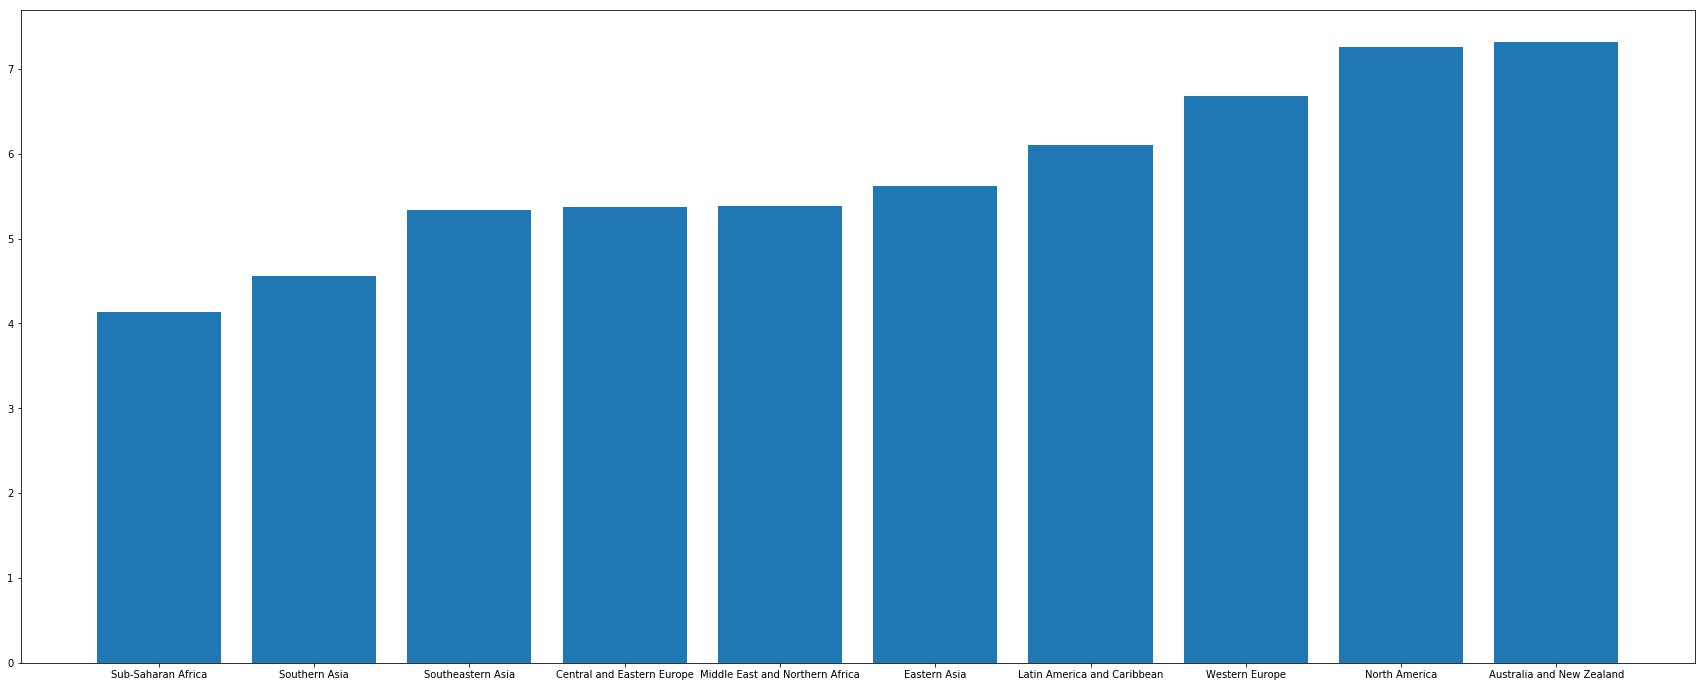

In [334]:
#make a bar graph for the table above
y_pos = np.arange(len(df_region))
plt.figure(figsize=(30,12))
plt.bar(y_pos, df_region['Happiness Score'])
plt.xticks(y_pos, df_region['Region']) 
plt.show()

#### 3.1.2  Top 10 and Last 10 rank

In [336]:
#get the dataframe for  the top 10 country
df_top = df[['Country','Happiness Rank','Happiness Score']][:10]
df_top.head()

,Country,Happiness Rank,Happiness Score
0,Denmark,1,7.526
1,Switzerland,2,7.509
2,Iceland,3,7.501
3,Norway,4,7.498
4,Finland,5,7.413


In [337]:
#get the dataframne for bottom 10 coutry
df_bottom = df[['Country','Happiness Rank', 'Happiness Score']][145:]
df_bottom.head()

,Country,Happiness Rank,Happiness Score
145,Uganda,145,3.739
146,Yemen,147,3.724
147,Madagascar,148,3.695
148,Tanzania,149,3.666
149,Liberia,150,3.622


#### 3.1.3 Hapiness score distributed by Countries

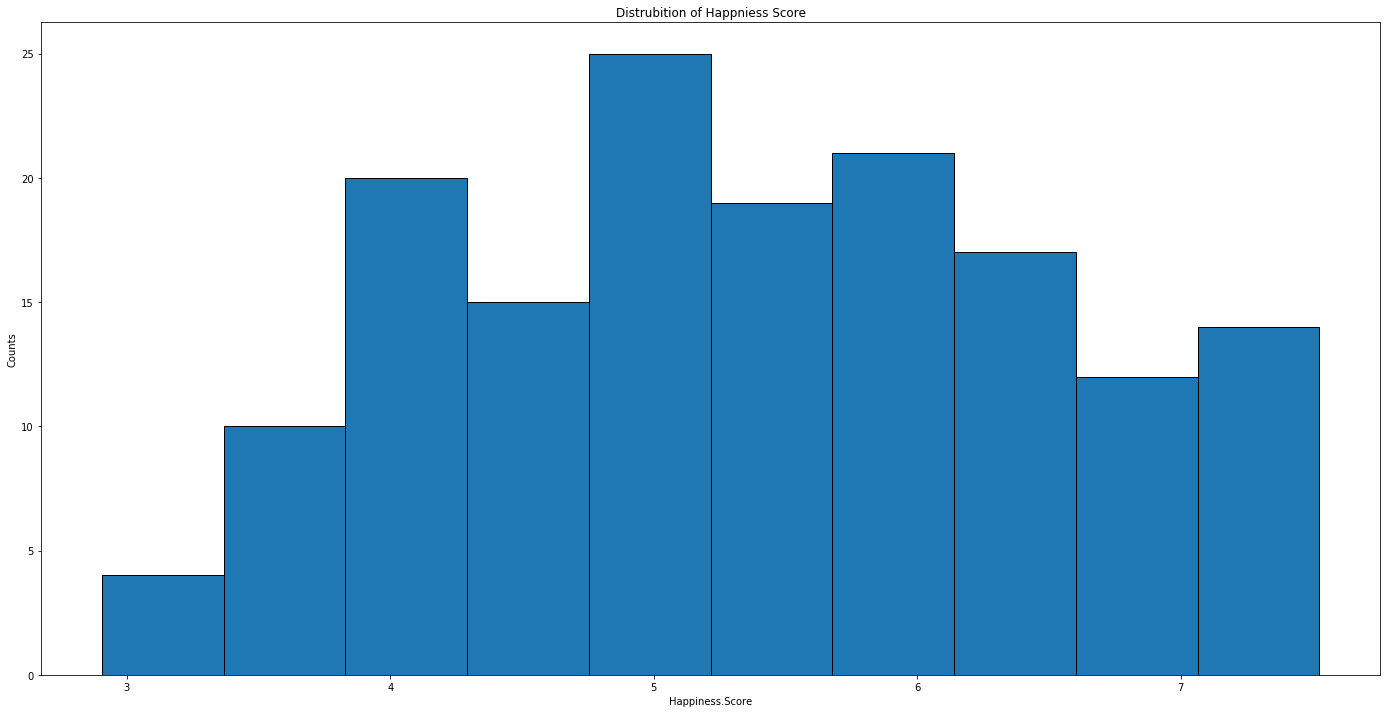

In [338]:
#plot the distribution for happiness score by Countries and save the image
plt.figure(figsize=(24,12))
plt.hist(df['Happiness Score'],edgecolor='black')
plt.xlabel('Happiness.Score')
plt.ylabel('Counts')
plt.title("Distrubition of Happniess Score")
plt.savefig("Distrubition_of_Happniess_Score.png")
plt.show()

#### 3.1.3 Statiscally summary and boxplot

In [339]:
#get the statiscally summary
df_summary = df['Happiness Score'].describe()
df_summary

count    157.000000
mean       5.382185
std        1.141674
min        2.905000
25%        4.404000
50%        5.314000
75%        6.269000
max        7.526000
Name: Happiness Score, dtype: float64

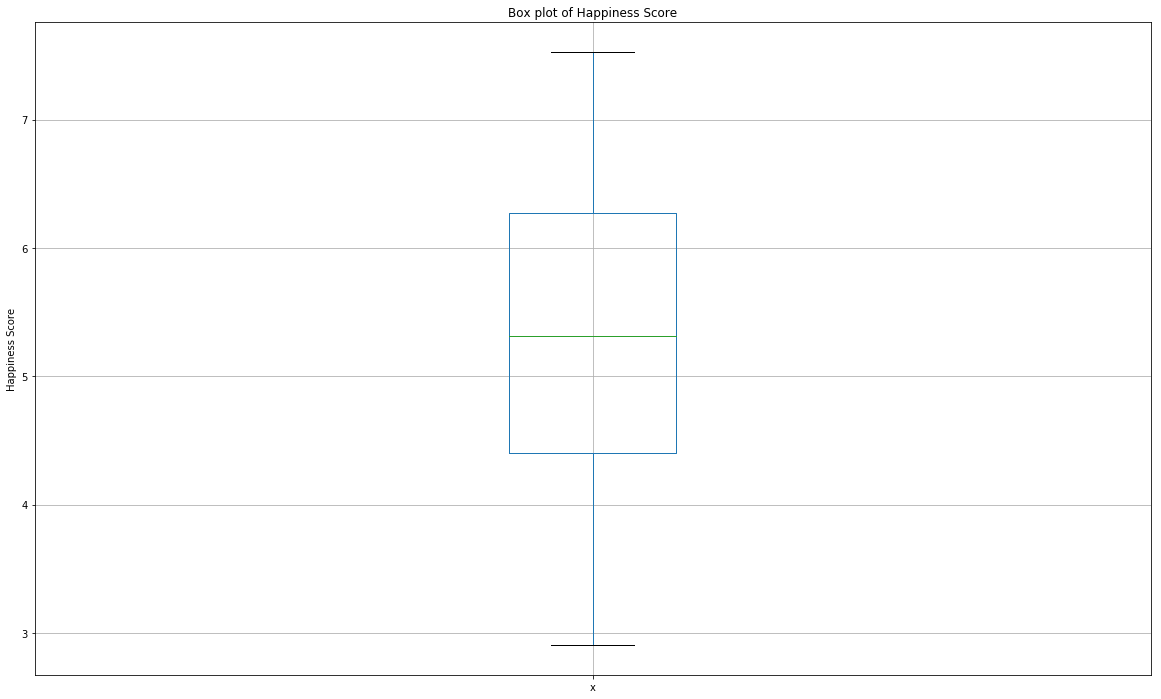

In [340]:
#plot the boxlot and save the image
plt.figure(figsize=(20,12))
pd.DataFrame.boxplot(df['Happiness Score'])
plt.ylabel('Happiness Score')
plt.title('Box plot of Happiness Score')
plt.savefig("Boxplot_of_Happniess_Score.png")
plt.show()

#### 3.1.4 rank and score by specific country

In [332]:
#get the rank and score for Untied States and China
df_usa = df.loc[df['Country'] == "United States",['Country', 'Region','Happiness Rank','Happiness Score']]
df_China = df.loc[df['Country'] == "China",['Country', 'Region','Happiness Rank','Happiness Score']]

In [330]:
df_usa

,Country,Region,Happiness Rank,Happiness Score
12,United States,North America,13,7.104


In [331]:
df_China

,Country,Region,Happiness Rank,Happiness Score
82,China,Eastern Asia,83,5.245


### 3.2 Coefficient correlation 
A correlation coefficient is a single number that describes the degrees of linear relationship between two set of variables. It tells how strong correlation these two variables are. This step is important because it could inform reader about how strong each variable correlated with Happiness score. 

In [318]:
df.columns # get the columns' name

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [319]:
df.dtypes # check the type od data

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [320]:
# calculated coefficient correlation for each factor with Happiness score
columns_names = (df.columns[6:-1]).tolist()
coef = []
for i in columns_names:
    print(i)
    print(tem_coeff)
    tem_coeff = np.corrcoef(df['Happiness Score'],df[i])[0,1]
    coef.append(tem_coeff)

Economy (GDP per Capita)
0.156847796404
Family
0.790322016726
Health (Life Expectancy)
0.739251577407
Freedom
0.765384334434
Trust (Government Corruption)
0.566826673097
Generosity
0.402032245147


In [321]:
#make the datafrane to display
df_coeff = pd.DataFrame({'Correlation Coefficient with Happiness' : coef, 'Factor': columns_names})
df_coeff = df_coeff[['Factor','Correlation Coefficient with Happiness']]
#sort the dataframe by coe correlation
df_coeff = df_coeff.sort_values(by = ['Correlation Coefficient with Happiness'])
df_coeff

,Factor,Correlation Coefficient with Happiness
5,Generosity,0.156848
4,Trust (Government Corruption),0.402032
3,Freedom,0.566827
1,Family,0.739252
2,Health (Life Expectancy),0.765384
0,Economy (GDP per Capita),0.790322


### 3.3 Mutlple Linear Model Prediction
In this step, Multiple Linear Regression attempts to model the relationship between variables and happiness score by fitting a linear equation to obsersved data. This describe how mean of happiness score change with the variables.  This method is helpful because it can tell me which factors influence the happiness score most and least. It can reflect a way how each variable influence the happiness score and tell me how efficient improve the happiness score.

In [214]:
#get the x and y for fitting the model
x = df[df.columns[6:-1]]
y = df['Happiness Score']

In [322]:
#import extra statistically package for predicting
from statsmodels.regression import linear_model
from statsmodels.api import add_constant

In [323]:
#display the statiscally summary 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1191.
Date:                Sun, 10 Dec 2017   Prob (F-statistic):          2.01e-124
Time:                        16:00:23   Log-Likelihood:                -186.04
No. Observations:                 157   AIC:                             384.1
Df Residuals:                     151   BIC:                             402.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Economy (GDP per Capita)          0.7232      0.326      2.215      0.028       0.078       1.368
Family                            2.3765      0.322      7.376      0.000       1.740       3.013
Health (Life Expectancy)          2.0901      0.520      4.021      0.000       1.063       3.117
Freedom                           2.7120      0.569      4.769      0.000       1.588       3.835
Trust (Government Corruption)     0.4333      0.697      0.622      0.535      -0.944       1.810
Generosity                        1.7095      0.518      3.302      0.001       0.687       2.732
==============================================================================
Omnibus:                        0.459   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.590
Skew:                           0.110   Prob(JB):                        0.744
Kurtosis:                       2.795   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4 Finding

### 4.1 Happniess Score by Region

In [223]:
df_region

,Region,Happiness Score
8,Sub-Saharan Africa,4.136421
7,Southern Asia,4.563286
6,Southeastern Asia,5.338889
1,Central and Eastern Europe,5.370690
4,Middle East and Northern Africa,5.386053
2,Eastern Asia,5.624167
3,Latin America and Caribbean,6.101750
9,Western Europe,6.685667
5,North America,7.254000
0,Australia and New Zealand,7.323500


From the table above, I found that the Australia and new Zealand region have the highest happiness score and North America region has the second highest happiness score. The sub-Saharan Africa has the lowest happiness score. Thus from my intuition, I assume that the developed and rich regions may has higher happiness score than remote and un-developed region such as Sub-Saharan Africa. I need more evidence to verity this assumption.


### 4.2 Top 10 and bottom 10 Countries

In [230]:
df_top

,Country,Happiness Rank,Happiness Score
0,Denmark,1,7.526
1,Switzerland,2,7.509
2,Iceland,3,7.501
3,Norway,4,7.498
4,Finland,5,7.413
5,Canada,6,7.404
6,Netherlands,7,7.339
7,New Zealand,8,7.334
8,Australia,9,7.313
9,Sweden,10,7.291


In [231]:
df_bottom

,Country,Happiness Rank,Happiness Score
145,Uganda,145,3.739
146,Yemen,147,3.724
147,Madagascar,148,3.695
148,Tanzania,149,3.666
149,Liberia,150,3.622
150,Guinea,151,3.607
151,Rwanda,152,3.515
152,Benin,153,3.484
153,Afghanistan,154,3.360
154,Togo,155,3.303


From above tables, we can see that the top countries are almost Europe countries and developed countries and the bottom 10 countries are almost African countries which match with the happiness score distributed by regions. From my intuition, the name of . The country in the bottom looks like they are remote, undeveloped, and suffering poor from my intuition, which means they should have low happiness score from my intuition. Also, from my intuition, the countries in the top 10, I has no surprise because I think they should be there because they are developed countries and their people should be happy because they are richer than other. I need to explore more to verify whether my intuition about these countries is right because they are poor and undeveloped or they have low happiness score because other reasons, which I ignore before. 

### 4.3 Statistical Summary of Happiness Score

In [238]:
df_summary

count    157.000000
mean       5.382185
std        1.141674
min        2.905000
25%        4.404000
50%        5.314000
75%        6.269000
max        7.526000
Name: Happiness Score, dtype: float64

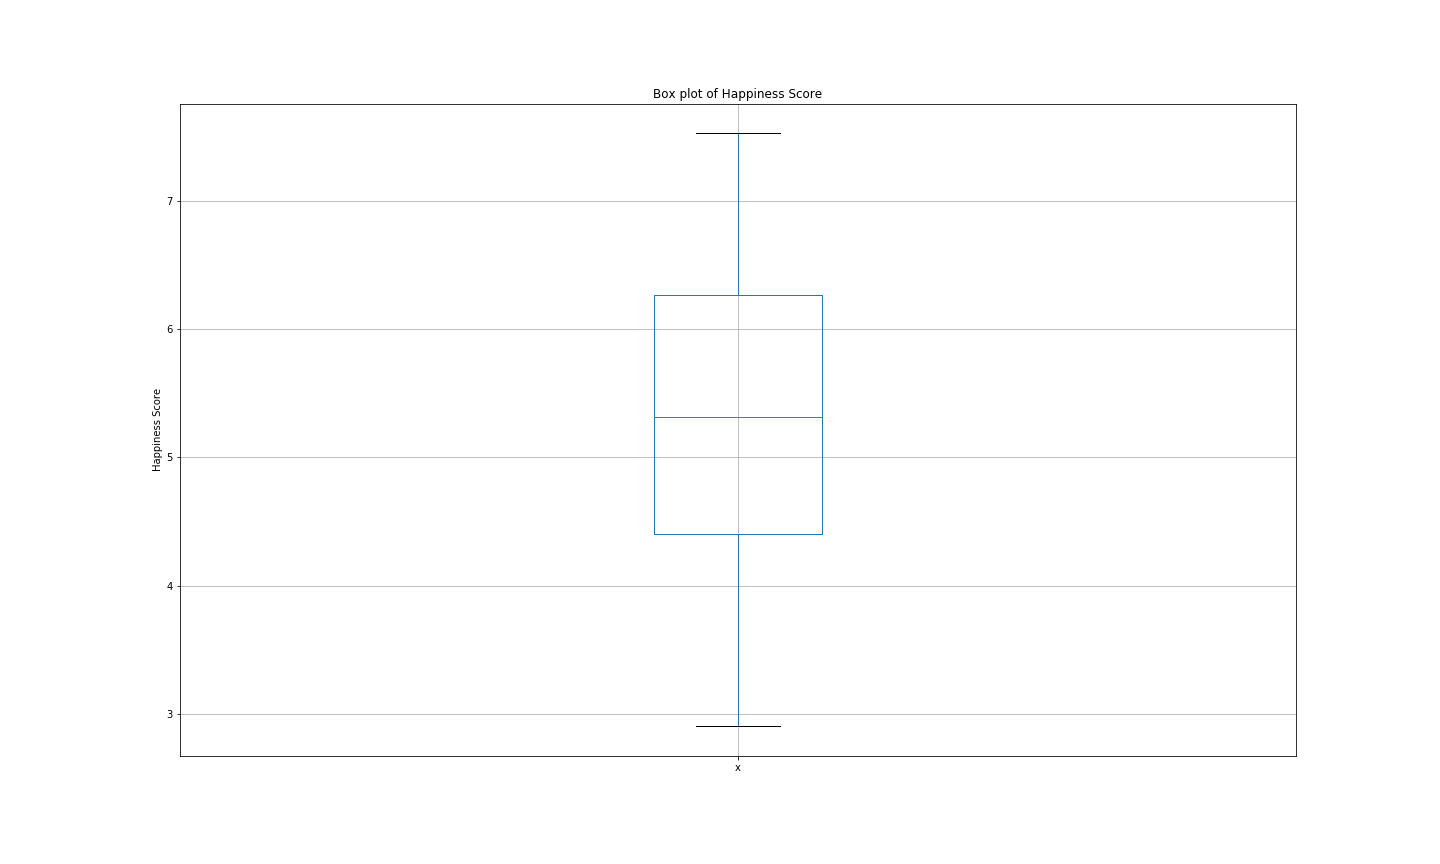

In [283]:
Image('Boxplot_of_Happniess_Score.png')

The Happiness score in range from 2.905 to 7.526, the mean is 5.382. The standard deviation is not huge, It is 1.141674, which means the happiness score among every countries tend to be close to the mean. The meand and the median is almost same. But it not means the distribution is symmetric and is unimodal. We should also check the plot of distribution. 

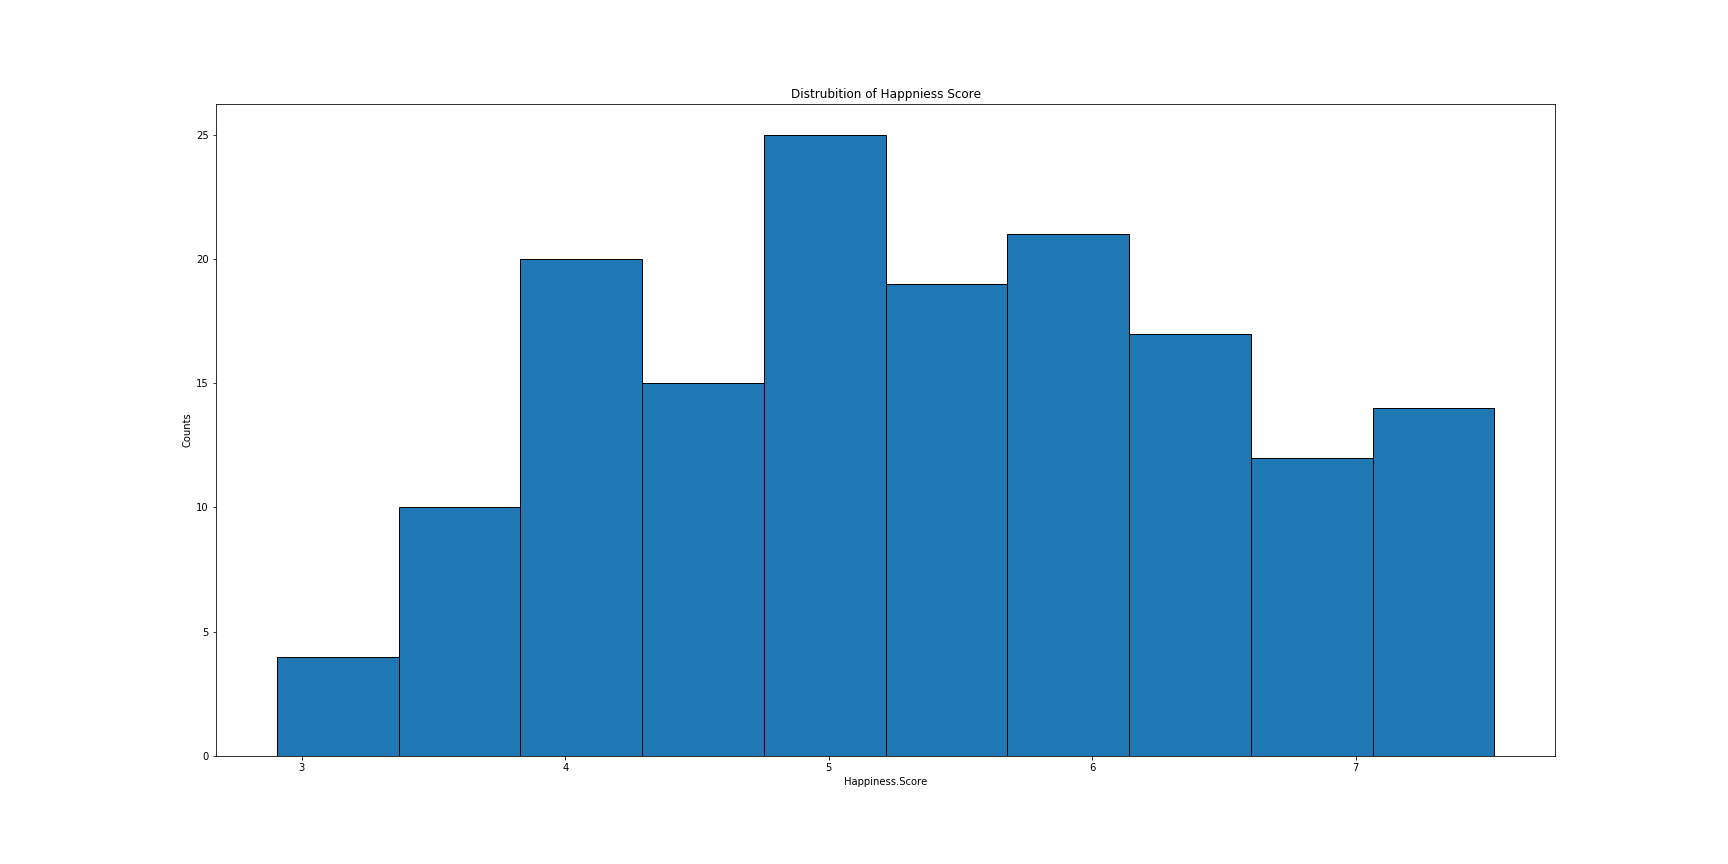

In [277]:
Image("Distrubition_of_Happniess_Score.png")

From the distribution plot of happiness score, we could see that the happiness are closed to normal distribution but a little bit screw to right, which is positive skewed.  However, we could not conclude the distribution is symmetric and unimodal.

### 4.4 Where is United States ?

In [263]:
df_usa

,Country,Region,Happiness Rank,Happiness Score
12,United States,North America,13,7.104


It is a surprise for me that super country like Unite State is not in the list of Top 10. The United Sates is in Rank 13 and 7.104 score. However, American Happiness is far higher than average scores(5.382) and still in the fourth quintile, which means  United States has higher happiness score than at least 75% countries. 

### 4.5 Where is my Country ?

In [290]:
df_China

,Country,Region,Happiness Rank,Happiness Score
82,China,Eastern Asia,83,5.245


I came from China and thus I also want to know what is the happiness score and rank of my country. My country got 5.245 score and rank 83. It is a little bit surprise for me cause I think I am pretty happy and my friends who are Chinese are also very happy. However, it is a bias because me and my friends are just little portion of Chinese. We are a little a below average and median, and we are in the second quantile.  

I think lots of people may have some question as me, I am happy and my friends around me look happy but why our country has lower rank as our expect?  This is actually bias because we are just little portion of our country, which means we cant represent as our whole country. Thus, exploring the what correlated and influence the happiness score is important. We need let the truth speak rather than intuition.

## 4.5 Pearson correlation coefficient 

In [291]:
df_coeff

,Factor,Correlation Coefficient with Happiness
5,Generosity,0.156848
4,Trust (Government Corruption),0.402032
3,Freedom,0.566827
1,Family,0.739252
2,Health (Life Expectancy),0.765384
0,Economy (GDP per Capita),0.790322


According to definition of Person Coefficient Correlation from Wikipedia, is a measure of linear correlation between two variables X and Y. It has a value between +1 and -1, where 1 is total positive linear correlation, 0 is no linear correlation, and -1 is total negative linear correlation. 

From the result, I found that all the factor has positive correlation with Happiness score. The economy, health and family is most correlation with Happiness score and the Generosity is least correlated with happiness score. However we should remember that correlation score show only how strong the linear relationship is, the strong linear correlation does not guaranty cause and effect. 

## 4.6  Multiple Linear Regression Model

In [317]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1191.
Date:                Sun, 10 Dec 2017   Prob (F-statistic):          2.01e-124
Time:                        14:27:21   Log-Likelihood:                -186.04
No. Observations:                 157   AIC:                             384.1
Df Residuals:                     151   BIC:                             402.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Economy (GDP per Capita)          0.7232      0.326      2.215      0.028       0.078       1.368
Family                            2.3765      0.322      7.376      0.000       1.740       3.013
Health (Life Expectancy)          2.0901      0.520      4.021      0.000       1.063       3.117
Freedom                           2.7120      0.569      4.769      0.000       1.588       3.835
Trust (Government Corruption)     0.4333      0.697      0.622      0.535      -0.944       1.810
Generosity                        1.7095      0.518      3.302      0.001       0.687       2.732
==============================================================================
Omnibus:                        0.459   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.590
Skew:                           0.110   Prob(JB):                        0.744
Kurtosis:                       2.795   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above summary,  I found that Happniess score = 2.7120*Freedom	+ 2.3765*Family + 2.0901*Health (Life Expectancy) +  1.7095*Generosity + 0.7232*Economy (GDP per Capita)	+ 0.4333*Trust (Government Corruption)

From the multiple linear regression model, we could see how each factor influence the happiness score.  Freedom, Family and Health influence the happiness core most, their coefficient is 2.712, 2,3765, and 2,0901. Meanwhile, their t score is pretty high with means their statistical significant number is pretty high. The Trust(Government Corruption) has least influence on happiness score and low statistically significant. The high Statistically  means the likelihood that the relationship between this factor and happiness score  is not random chance. 

Also the R^2 and adjusted R^2 value is pretty high. They are 0.979. According to the definition, the R^2 is a statistic that will give some information about the goodness of fit of a model. An R^2 of 1 indicates that the regression line perfectly fits the data. We got 0.979，which means the regression fit the model pretty good and the prediction is reliable. 

# 5 Discussion

### 5.1 Limitation
There are some limitations in my project, 
First of all, I only assume that each factor is linear relationship with Happiness score. 

Second, for the Coefficient correlation, I only calculate the  value of coefficient correlation for single factors.

Third, my available for predicting multiple linear regression model is not enough. I only have the variables from one dataset. 


### 5.2 Future Work
In the future, I will 

First, I will consider more regression model to predict happiness score and compare them. 

Second, I will calculate coefficient correlation of multiple factors with happiness score. 

 
 Third, I will find more related dataset such as health, violent, crime dataset to combine with. I will add more variable for my analysis.  I will analyze the correlation between happiness score with health condition and  how happiness score influence violent and crime rate. 

### 5.3 imporance of project

1. For government and citizens, knowing their rank and score of happiness comparing with worldwide ranking and score is important. They should know how exactly their score and ranking rather than feeling I am happy and people around me are happy.  They should know where they exactly are.

2. Knowing the coefficient of factors that could efficiently improve the happiness score and most correlated with the happiness score is import for governments and related organizations because this could influence their policy making in the future. They should consider  specific policy to improve related to factors to increase the happiness score for their citizens.

3. Knowing the importance of how happiness could influence our health, crime rate, and violent rate. It is important to draw citizens and governments’ attention about how important happiness score to their country and citizens.


# 6 Conculsion

#### 6.1. How does the Happiness Rank and Score distribute by countries, Regions ?
The Bottom 10 happiness countries are Uganda, Yemen, Madagascar, Tanzania, Liberia, Guinea, Rwanda, Benin, Afghanistan, Togo, Syria and Burundi. Most of them are African countries.

#### 6.2. Does super country like United States has high rank? 
United States is not in top 10 but in rank 13 with 7.104 Happiness score.


#### 6.3 Which factors most and least correlated with the happniess score? 
Economy( GDP per Capita), Health( Life Expectancy), and family is most correlated with happiness score. The Generosity is least correlated with happiness score.




#### 6.4. Which factors most and least influence the happniess score? 
Freedom and Family influence the Happiness score most with high statically significant and Trust (Government Corruption) influence Happiness score with low statically significant.

My project is not endpoint for happiness. Other other hand, my project is a start point for human-centered data scientist. As a data scientist, they could explore more based on my project. They could analyze how to improve freedom and family index score to improve Happiness score, they could explore how each level of happiness score represent what kind of emotion and condition, they could what will happen when worldwide overall happiness score improve base on my project. We are human-centered data scientist, our job  is start from human and suit the human needs. 

# 7 Reference

1. WORLD HAPPINESS REPORT. (n.d.). Retrieved December 10, 2017, from http://worldhappiness.report/
 
2. Happiness. (2017, December 09). Retrieved December 10, 2017, from https://en.wikipedia.org/wiki/Happiness
 
3. Newman, K. M. (2015, July 28). Six Ways Happiness Is Good for Your Health. Retrieved December 10, 2017, from https://greatergood.berkeley.edu/article/item/six_ways_happiness_is_good_for_your_health
 
4. University of California - Davis. "Happiness can deter crime, a new study finds." ScienceDaily. ScienceDaily, 23 August 2011. <www.sciencedaily.com/releases/2011/08/110822091859.htm>
 
5. Pearson correlation coefficient. (2017, December 07). Retrieved December 10, 2017, from https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
 
6. ORRELATION COEFFICIENT. (n.d.). Retrieved December 10, 2017, from https://www.sunshineprofits.com/gold-silver/dictionary/correlation-coefficient-gold/
 
7. Mutiple Linear Regression Http://www.stat.yale.edu/Courses/1997-98/101/linmult.htm. (n.d.). Retrieved December 10, 2017, from http://www.stat.yale.edu/Courses/1997-98/101/linmult.htm
 
8. Skewness. (2017, December 07). Retrieved December 10, 2017, from https://en.wikipedia.org/wiki/Skewness
 
9. Normal distribution. (2017, December 09). Retrieved December 10, 2017, from https://en.wikipedia.org/wiki/Normal_distribution